In [23]:
import pandas as pd
import os
import sys
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
#import matplotlib.pyplot as plt and seaborn for visualisation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# regular expressions for removing special characters, such as punctuation
import re
# gensim is a library for text processing including n-gram models
import gensim
from gensim.utils import simple_preprocess
# spacy is also for text processing, here we are using the lemmatiser
import spacy
# This package draws word clouds, as a form of frequency analysis
!pip install wordcloud

In [24]:
sentiments_df = pd.read_csv('IMDB Dataset.csv')

In [25]:
sentiments_df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [26]:
# Remove punctuation
sentiments_df['review'] = sentiments_df['review'].apply(str).map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
sentiments_df['review'] = sentiments_df['review'].apply(str).map(lambda x: x.lower())
# Print out the first rows of reviews
print(sentiments_df['review'].apply(str).head()) 

0    one of the other reviewers has mentioned that ...
1    a wonderful little production <br /><br />the ...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object


In [27]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))   
#deacc=True removes punctuations
#data = imdb_df['review'].tolist()
data = sentiments_df['review'][0:500].tolist()
data_words = list(sent_to_words(data))
print('data_words[:1]', data_words[:1])

data_words[:1] [['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', 'oz', 'episode', 'you', 'll', 'be', 'hooked', 'they', 'are', 'right', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me', 'br', 'br', 'the', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'go', 'trust', 'me', 'this', 'is', 'not', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', 'this', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', 'sex', 'or', 'violence', 'its', 'is', 'hardcore', 'in', 'the', 'classic', 'use', 'of', 'the', 'word', 'br', 'br', 'it', 'is', 'called', 'oz', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'it', 'focuses', 'mainly', 'on', 'emerald', 'city', 'an', 'experimental', 'section', 'of', 'the', 'prison',

In [28]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 
# higher threshold fewer phrases.
print('bigram',bigram)
print('bigram data',bigram[data_words])
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
print('trigram',trigram)

bigram Phrases<81954 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
bigram data <gensim.interfaces.TransformedCorpus object at 0x7fc74a4c4290>


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


trigram Phrases<82073 vocab, min_count=5, threshold=100, max_vocab_size=40000000>


In [29]:
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
bigram_mod.save("bigram_mod")
trigram_mod.save("trigram_mod")
bigram_mod = gensim.models.Phrases.load("bigram_mod")
trigram_mod = gensim.models.Phrases.load("trigram_mod")

In [30]:
for bigram in bigram_mod.phrasegrams.keys():
    print('bigram',bigram)
for trigram in trigram_mod.phrasegrams.keys():
    print('trigram',trigram)

bigram (b'serial', b'killer')
bigram (b'new', b'york')
bigram (b've', b'seen')
bigram (b'at', b'least')
bigram (b'low', b'budget')
bigram (b'year', b'old')
bigram (b'reminds', b'me')
bigram (b'ever', b'seen')
bigram (b'high', b'school')
bigram (b'special', b'effects')
bigram (b'character', b'development')
bigram (b'subject', b'matter')
bigram (b'civil', b'war')
bigram (b'cold', b'mountain')
bigram (b'halfway', b'through')
bigram (b'second', b'half')
bigram (b'fast', b'forward')
bigram (b'hong', b'kong')
bigram (b'each', b'other')
bigram (b'my', b'opinion')
bigram (b'found', b'myself')
bigram (b'years', b'ago')
bigram (b'small', b'town')
bigram (b'theme', b'song')
bigram (b'rock', b'roll')
bigram (b'star', b'trek')
bigram (b'sit', b'through')
bigram (b'sci', b'fi')
bigram (b'huge', b'fan')
bigram (b'jane', b'austen')
bigram (b'anne', b'rice')
bigram (b'new', b'world')
bigram (b'pretty', b'woman')
bigram (b'jackie', b'chan')
bigram (b'throw', b'momma')
bigram (b'gentleman', b'jim')
bigra

In [31]:
from gensim.parsing.preprocessing import STOPWORDS
my_stop_words = STOPWORDS.union(set(['br','film', 'movie']))
# Define functions for stopwords, bigrams, trigrams and lemmatisation
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in 
my_stop_words] for doc in texts]

In [32]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [33]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in 
allowed_postags])
    return texts_out

In [34]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print('data_lemmatized[:1]', data_lemmatized[:1])

data_lemmatized[:1] [['reviewer', 'mention', 'watch', 'will', 'hook', 'right', 'exactly', 'happen', 'thing', 'strike', 'brutality', 'unflinching', 'scene', 'violence', 'set', 'right', 'word', 'trust', 'faint', 'hearte', 'timid', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'call', 'nickname', 'give', 'maximum', 'state', 'focus', 'mainly', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'privacy', 'high', 'agenda', 'city', 'home', 'italian', 'irish', 'moreso', 'scuffle', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'far', 'away', 'main', 'appeal', 'fact', 'go', 'show', 'dare', 'forget', 'pretty', 'picture', 'paint', 'mainstream', 'audience', 'forget', 'mess', 'see', 'strike', 'watch', 'developed', 'taste', 'get', 'accustomed', 'high', 'level', 'graphic', 'violence', 'violence', 'injustice', 'crooked', 'guard', 'will', 'sell', 'nickel', 'inmate', 'will', 'kill', 'order', 'mannere', 'middle', 'class', 'inmate', 'turn', '

In [35]:
from wordcloud import WordCloud

def getWordCloud(hashtags):
  # Read the whole text.
  text = ' '.join(hashtags)
  # Generate a word cloud image
  wordcloud = WordCloud().generate(text)
  # Display the generated image:
  # the matplotlib way:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  # lower max_font_size
  wordcloud = WordCloud(max_font_size=40).generate(text)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.savefig('wordcloud_all.pdf', dpi=500) 
  plt.show()

 

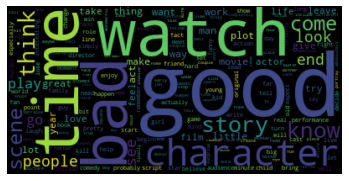

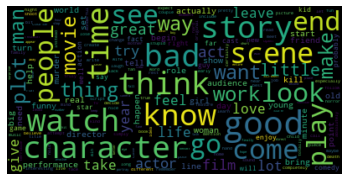

In [36]:
s = []
for l in data_lemmatized:
  t = ' '.join(l)
  s.append(t)

getWordCloud(s)

**Training a classifier**

In [37]:
# from sklearn.naive_bayes import MultinomialNB
# clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)


In [38]:
newdata = [''.join(str(x) for x in data_lemmatized)]

In [39]:
print(newdata)

["['reviewer', 'mention', 'watch', 'will', 'hook', 'right', 'exactly', 'happen', 'thing', 'strike', 'brutality', 'unflinching', 'scene', 'violence', 'set', 'right', 'word', 'trust', 'faint', 'hearte', 'timid', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'call', 'nickname', 'give', 'maximum', 'state', 'focus', 'mainly', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'privacy', 'high', 'agenda', 'city', 'home', 'italian', 'irish', 'moreso', 'scuffle', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'far', 'away', 'main', 'appeal', 'fact', 'go', 'show', 'dare', 'forget', 'pretty', 'picture', 'paint', 'mainstream', 'audience', 'forget', 'mess', 'see', 'strike', 'watch', 'developed', 'taste', 'get', 'accustomed', 'high', 'level', 'graphic', 'violence', 'violence', 'injustice', 'crooked', 'guard', 'will', 'sell', 'nickel', 'inmate', 'will', 'kill', 'order', 'mannere', 'middle', 'class', 'inmate', 'turn', 'prison', 'bitch', '